# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 2

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **26 февраля в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

In [4]:
import numpy as np
import scipy.stats as sps
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

import warnings
warnings.filterwarnings('ignore')

## Задача 1.

Рассмотрим данные исследования 2004 года о зависимости риска развития диабета от пола, возраста, индекса массы тела, среднего кровяного давления и других показателей. 

Функция `sklearn.datasets.load_diabetes()` возвращает словарь. В поле `data` записана матрица регрессоров, в которой данные предварительно центрированы и нормированы. В поле `target` записана мера прогрессирования заболевания в течении года. В поле `DESCR` можно прочитать подробнее о данных.

### Загрузка данных

In [78]:
data = load_diabetes()

Посмотрим на описание датасета.

In [79]:
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Поле `data` содержит матрицу размера 442 $\times$ 10, где 442 — количество пациентов, а 10 — количество признаков (возраст, пол, и т.д.). 
Строки матрицы соответствуют пациентам, столбцы — признакам.

In [80]:
data['data'].shape

(442, 10)

Целевая переменная $-$ мера прогрессирования заболевания в течении года.


In [81]:
data['target'].shape

(442,)

Создайте матрицу регрессоров $X$ и столбец наблюдений $y$.

In [82]:
X, y = data['data'], data['target']

### Обучение моделей

Разбейте данные случайно на две части — обучающую и тестовую в соотношении 80:20.

Если что-то забыли или что-то не понятно, можно почитать справку:

In [83]:
train_test_split?

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 10) (89, 10) (353,) (89,)


Заведите модель линейной регрессии из `sklearn` и обучите ее по обучающей части данных.

In [85]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)

LinearRegression()

Выведите кооэффициенты модели, включая свободный член.

In [86]:
model.coef_

array([  -12.44764662,  -283.53064989,   507.19034438,   327.12502885,
       -1075.31918633,   742.35979556,   198.30179992,   128.56163903,
         915.3581227 ,    44.32867584])

In [87]:
model.intercept_

152.61618405097903

Посчитайте предсказания построенной модели на тестовой выборке

In [88]:
y_pred = model.predict(X_test)

Реализуйте метрики MSE, MAE, MAPE без использования `sklearn` и других готовых реализаций.

In [89]:
def mean_squared_error(y_true, y_pred):
    mse=0
    for i in range(len(y_true)):
        mse+=(y_true[i]-y_pred[i])**2
    mse=mse/len(y_true)
    return(mse)

In [90]:
def mean_absolute_error(y_true, y_pred):
    mae=0
    for i in range(len(y_true)):
        mae+=abs(y_true[i]-y_pred[i])
    mae=mae/len(y_true)
    return(mae)

In [91]:
def mean_absolute_percentage_error(y_true, y_pred):
    maep=0
    for i in range(len(y_true)):
        maep+=abs((y_true[i]-y_pred[i])/y_true[i])
    maep=(maep/len(y_true))*100
    return(maep)

Посчитайте MSE, MAE, MAPE на тестовой выборке и выведите с точностью до трех знаков после запятой.

In [92]:
print('MSE:',round(mean_squared_error(y_test, y_pred),3))
print('MAE:',round(mean_absolute_error(y_test, y_pred),3))
print('MAPE:',round(mean_absolute_percentage_error(y_test, y_pred),3))

MSE: 3056.29
MAE: 42.416
MAPE: 42.004


Постройте графики зависимости предсказания прогрессирования заболевания от различных признаков по отдельности. При работе с конкретным признаком полагайте значения остальных признаков равными средним значениям этих признаков на тестовой выборке.

Все графики нарисуйте в одном окне.


*Может помочь следующий код:*

`
copies = np.tile(a, k).reshape((k, -len(a))) 
` *создает $k$ копий массива `a` размера (`len(a)`, ).* 
*Размер полученной матрицы $k \times len(a)$.*

*Также рекомендуется изучить ноутбуки с занятий.*





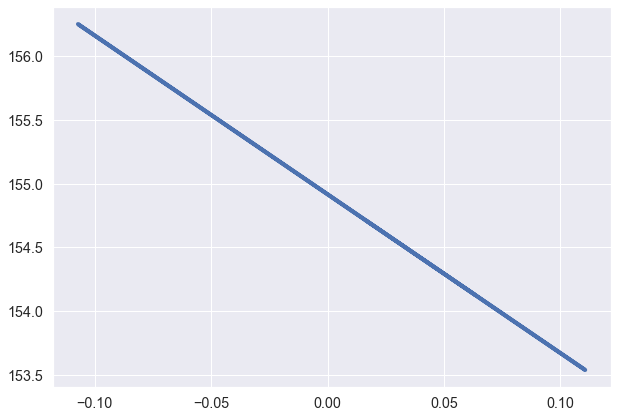

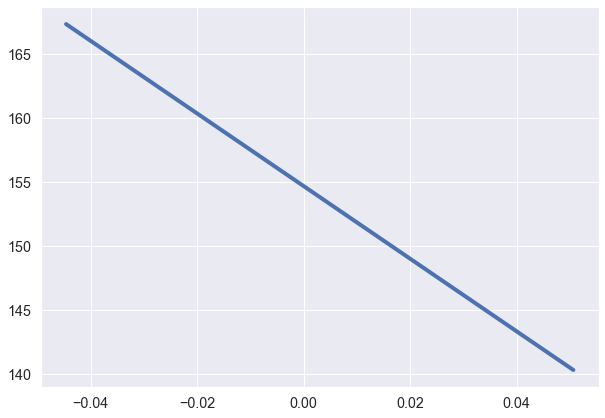

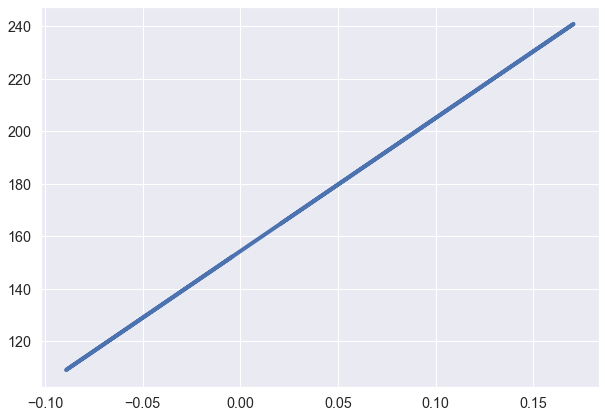

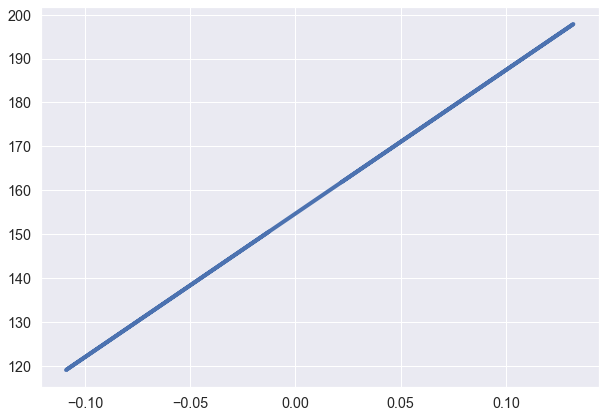

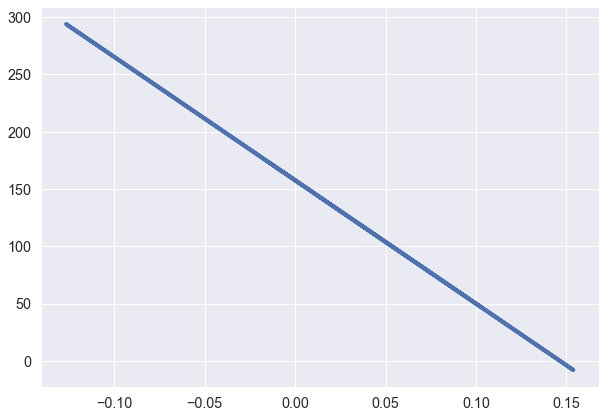

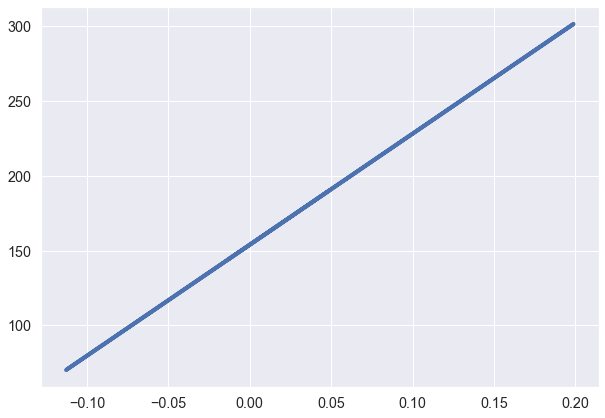

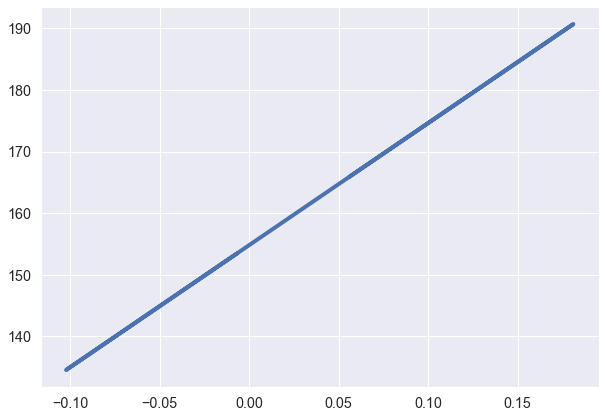

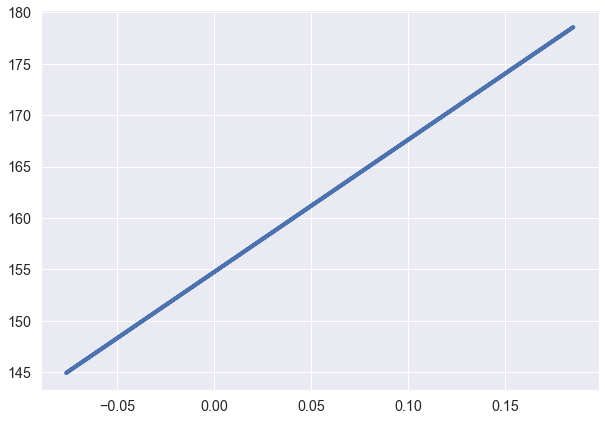

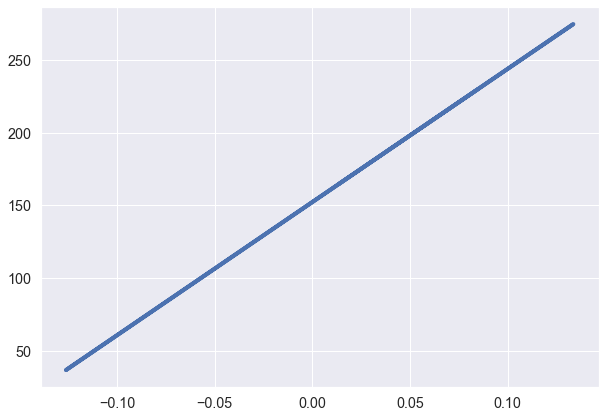

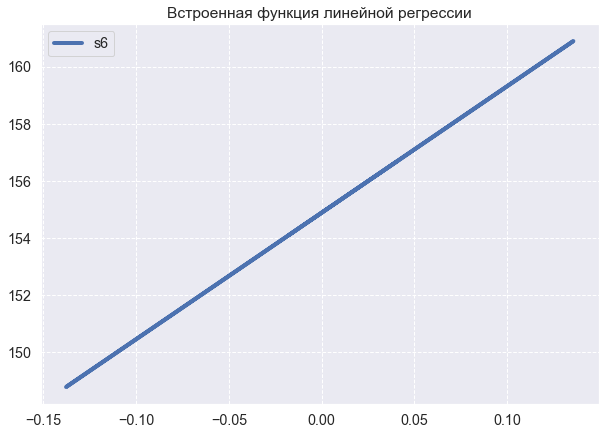

In [105]:
names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
meanarr = np.zeros(353)
meanarr = meanarr + X_train.T[0].mean()
for i in range(1, 10):
    meanarr = np.hstack((meanarr, [X_train.T[i].mean()]*353))
meanarr = meanarr.reshape(10, 353)
for i in range(10):
    plt.figure(figsize=(10, 7))
    tmp = np.copy(meanarr)
    tmp[i] = X_train.T[i]
    y_pred1 = model.predict(tmp.T)
    plt.plot(X_train.T[i], y_pred1, linewidth=4, label=names[i])
    
plt.title("Встроенная функция линейной регрессии")
plt.legend()
plt.grid(linestyle='--')
plt.show()

### Своя реализация модели

Теперь реализуем линейную регрессию самостоятельно, используя формулы с лекции.
Вам нужно только заполнить прочерки в методах `fit` и `predict`.

In [112]:
class MyLinearRegression:
    def __init__(self):
        pass
    def fit(self, X, Y):        
        self.theta = np.linalg.inv(X.T @ X) @  X.T @ Y
        return self
    def predict(self, X):
        y_pred = X @ self.theta
        return y_pred

Обучите вашу модель на данных о диабете с добавлением свободного члена.
Распечатайте коэффициенты и сравните их с коэффициентами модели из `sklearn`.

Коэффициенты готовой реализации:
 [  -12.44764662  -283.53064989   507.19034438   327.12502885
 -1075.31918633   742.35979556   198.30179992   128.56163903
   915.3581227     44.32867584]
Коэффициенты своей реализации со свободным членом:
 [  -12.44764662  -283.53064989   507.19034438   327.12502885
 -1075.31918633   742.35979556   198.30179992   128.56163903
   915.3581227     44.32867584]


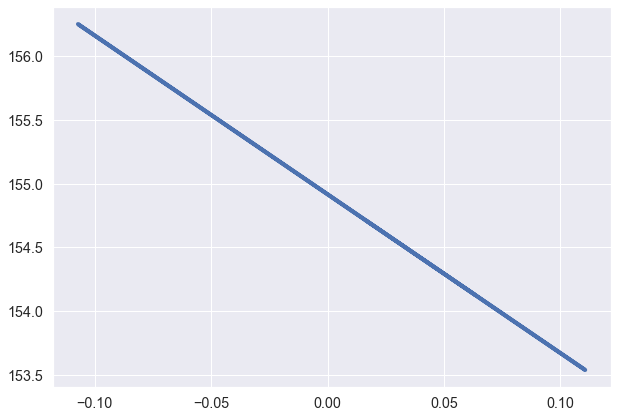

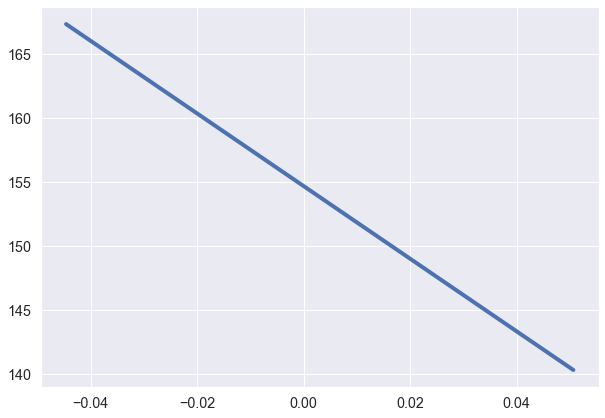

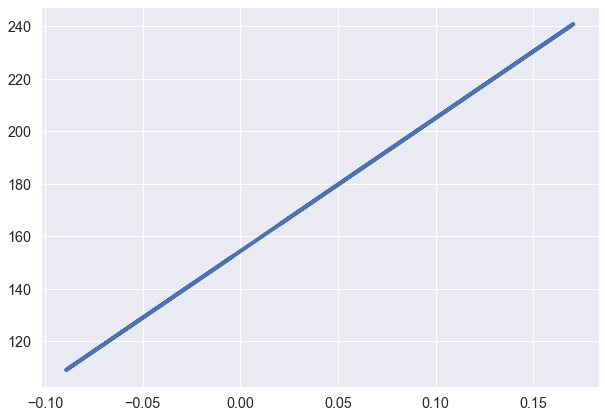

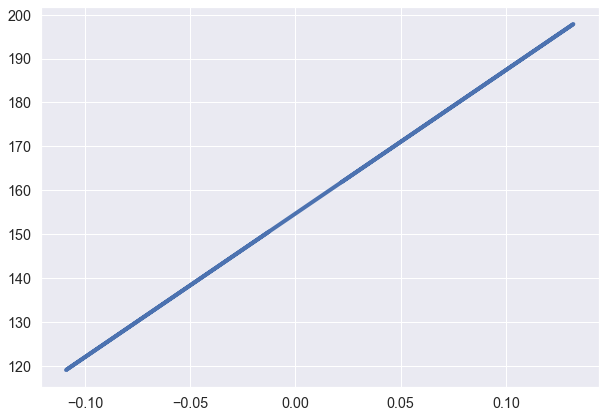

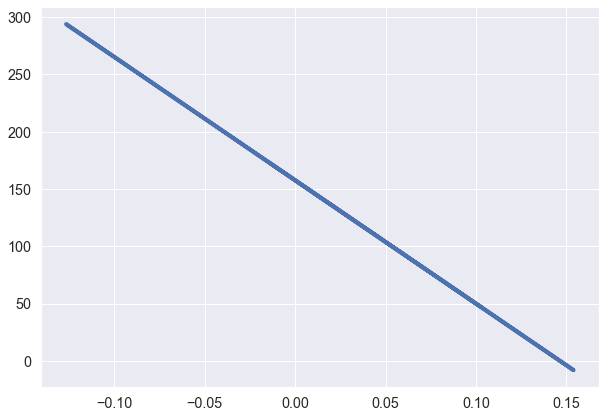

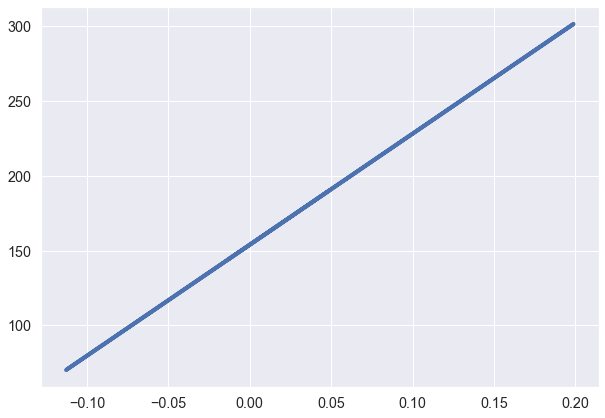

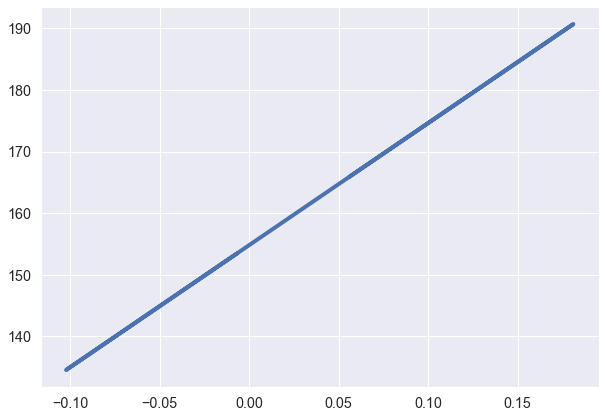

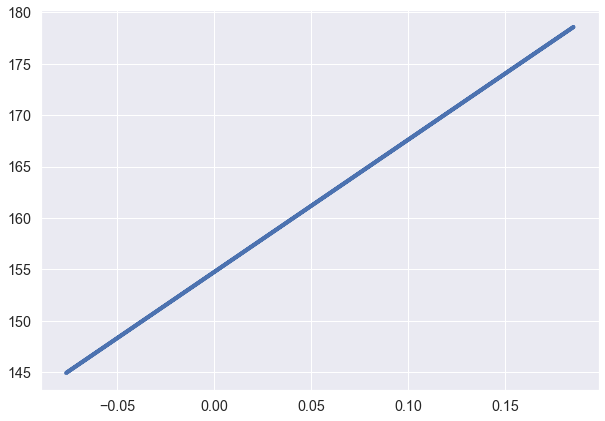

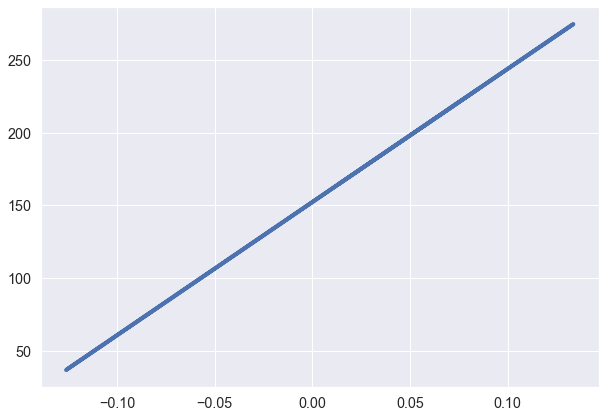

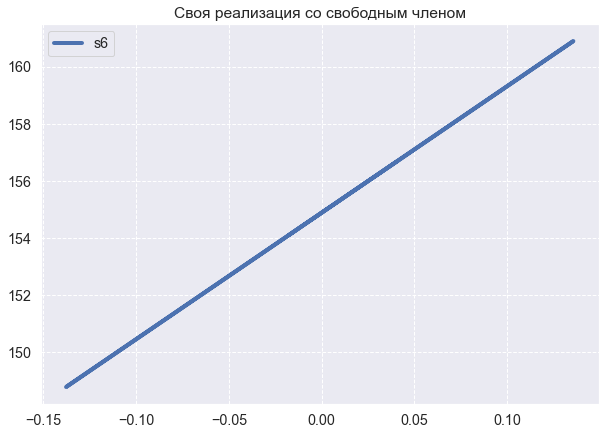

In [113]:
my = MyLinearRegression()
# добавляем свободный член
n, d = X_train.shape
c = np.ones(n)
X = np.column_stack((c, X_train))
# обучаем модель печатаем коэффы
my.fit(X, y_train)
print('Коэффициенты готовой реализации:\n', model.coef_)
print('Коэффициенты своей реализации со свободным членом:\n', my.theta[1:])
# аналогично для тестовой
n, d = X_test.shape
c = np.ones(n)
Xt = np.column_stack((c, X_test))
y_pred = my.predict(Xt)

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MAPE = mean_absolute_percentage_error(y_test, y_pred)


for i in range(10):
    plt.figure(figsize=(10, 7))
    tmp = np.copy(meanarr)
    tmp[i] = X_train.T[i]
    tmp = tmp.T
    n, d = tmp.shape
    c = np.ones(n)
    tmp = np.column_stack((c,tmp))
    y_pred1 = my.predict(tmp)
    plt.plot(X_train.T[i], y_pred1, linewidth=4, label=names[i])
    
plt.title("Своя реализация со свободным членом")
plt.legend()
plt.grid(linestyle='--')
plt.show()


Теперь обучите модель без свободного члена.

Коэффициенты готовой реализации:
 [  -12.44764662  -283.53064989   507.19034438   327.12502885
 -1075.31918633   742.35979556   198.30179992   128.56163903
   915.3581227     44.32867584]
Коэффициенты своей реализации без свободного члена:
 [-2.69530645e+01 -3.32075392e+02  5.14318476e+02  3.31265375e+02
 -1.60035370e+03  1.13733862e+03  6.44450672e+02  3.41135255e+02
  1.33003501e+03  1.21079227e+00]


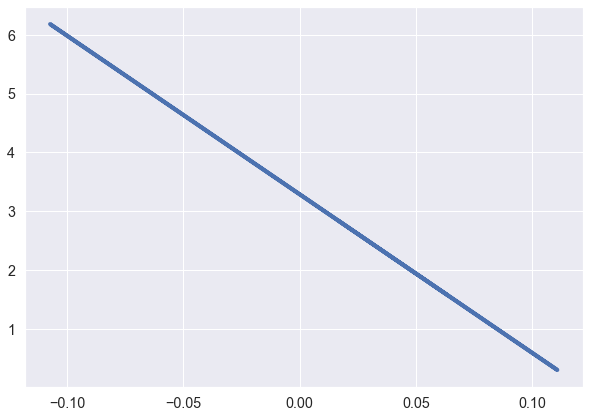

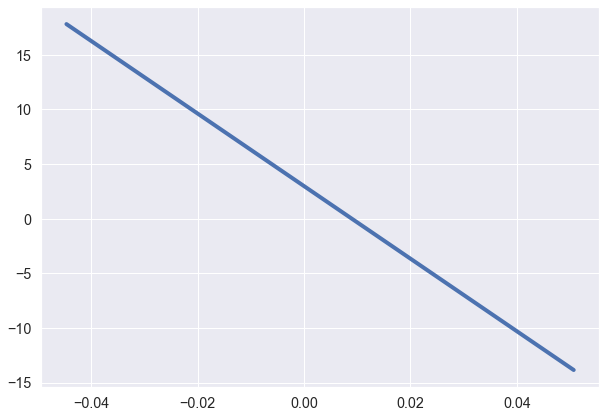

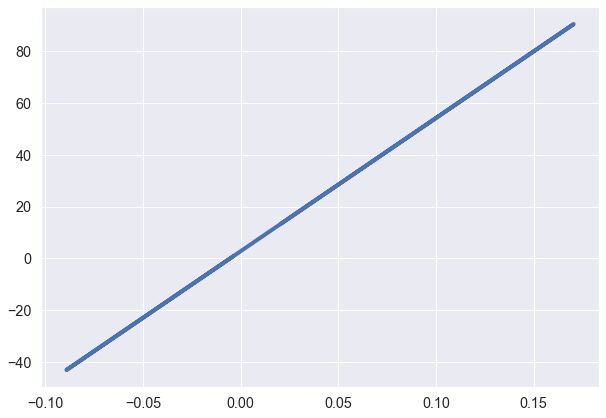

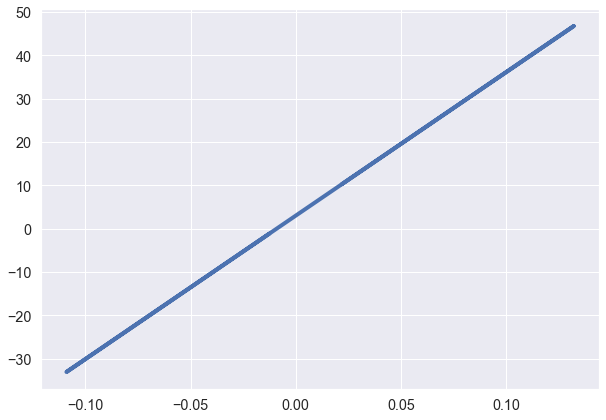

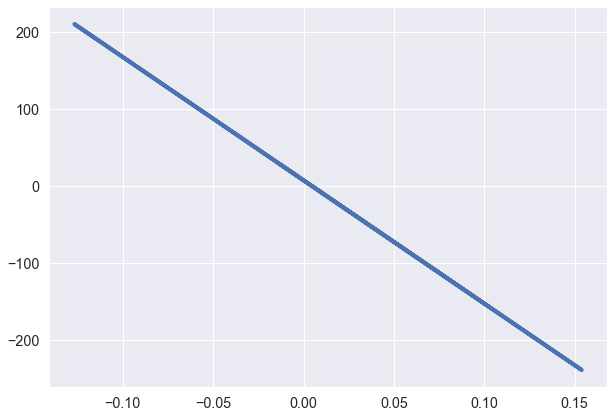

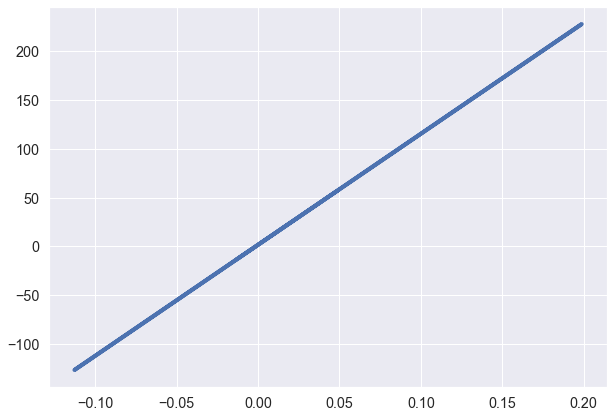

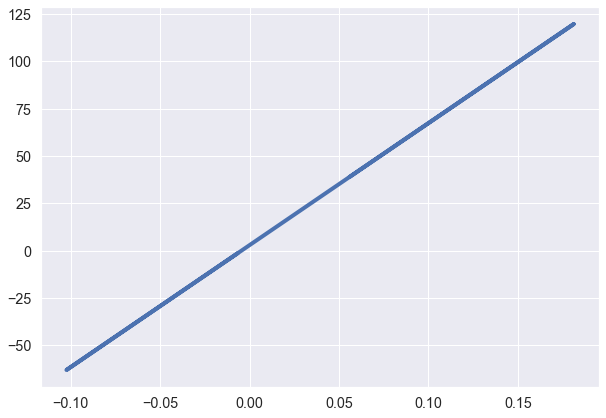

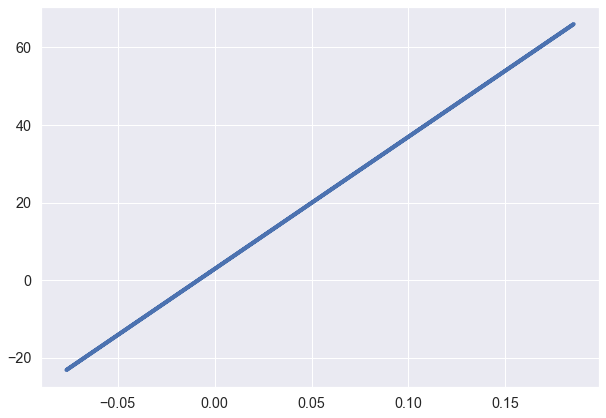

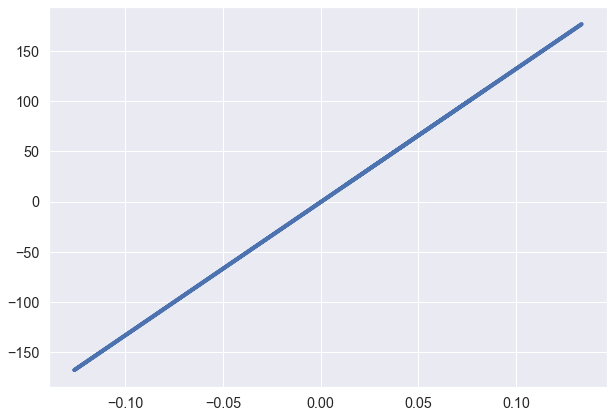

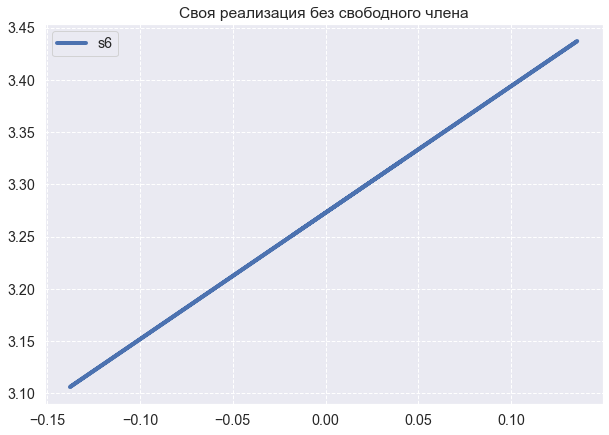

In [114]:
my = MyLinearRegression()
my.fit(X_train, y_train)
print('Коэффициенты готовой реализации:\n', model.coef_)
print('Коэффициенты своей реализации без свободного члена:\n', my.theta)
y_pred = my.predict(X_test)

MSE_wo = mean_squared_error(y_test, y_pred)
MAE_wo = mean_absolute_error(y_test, y_pred)
MAPE_wo = mean_absolute_percentage_error(y_test, y_pred)



for i in range(10):
    plt.figure(figsize=(10, 7))
    tmp = np.copy(meanarr)
    tmp[i] = X_train.T[i]
    tmp = tmp.T
    y_pred1 = my.predict(tmp)
    plt.plot(X_train.T[i], y_pred1, linewidth=4, label=names[i])

plt.title("Своя реализация без свободного члена")
plt.legend()
plt.grid(linestyle='--')
plt.show()


Сравните качество моделей со свободным членом и без него на тестовой выборке.

In [115]:
tabledata = [["MSE", int(MSE), int(MSE_wo)],
         ["MAE", int(MAE), int(MAE_wo)],
         ["MAPE", int(MAPE), int(MAPE_wo)]]
pd.DataFrame(tabledata, columns=["Тип ошибки","Своб чл", "Без своб чл"])

,Тип ошибки,Своб чл,Без своб чл
0,MSE,3056,27228
1,MAE,42,154
2,MAPE,42,133


Сделайте выводы.

**Вывод: проводить регрессию без свободного члена имеет смысл только если мы знаем что целевое значение (без учета погрешности) должно быть равно нулю при равных нулю коэффициентах. Иначе значения получаются очень неточными.**

## Задача 2.

### Часть 1

Скачайте [датасет](https://www.kaggle.com/deepu1109/star-dataset) и распакуйте. Вы получите файл `6 class csv.csv`. 
Он представляет собой таблицу некоторых характеристик звезд, таких как температура, радиус и т.д..
В описании к датасету указаны следующие типы звезд:
* Brown Dwarf (0),
* Red Dwarf (1),
* White Dwarf (2),
* Main Sequence (3),
* Supergiant (4),
* Hypergiant (5).

На основании характеристик мы хотим классифицировать звезды по типу. 


In [62]:
data = pd.read_csv("6 class csv.csv")
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [63]:
data.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

Для классификации с помощью kNN будем использовать только столбцы с числовыми значениями. 
Целевая переменная (класс) находится в столбце Star type.

Разделите данные на признаки $X$ и целевую переменную $y$.

In [64]:
needed_columns=['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
X = data[needed_columns]
y = data['Star type']

Разделите данные на тренировочную и тестовую выборки, `test_size` возьмите равным 0.3.

In [65]:

X_trains, X_tests, y_trains, y_tests = train_test_split(X,y, test_size=0.3)
X_trainsnp,X_testsnp, y_trainsnp, y_testsnp = X_trains.to_numpy(), X_tests.to_numpy(), y_trains.to_numpy(), y_tests.to_numpy()

print(X_trains.shape, X_tests.shape, y_trains.shape, y_tests.shape)

(168, 4) (72, 4) (168,) (72,)


Заведите модель классификатора kNN из `sklearn`, параметр `n_neighbours` возьмите по умолчанию. Обучите модель на тренировочной выборке

In [66]:
models = KNeighborsClassifier()
models.fit(X_trains,y_trains)
y_pred=models.predict(X_testsnp)
y_predtest=models.predict(X_trainsnp)

Реализуйте метрику accuracy без использования `sklearn` и других ее готовых реализаций.

In [67]:
def accuracy_score(y_true, y_pred):
    acc=0
    sch=0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            sch+=1
    acc=sch/len(y_true)
    return(acc)

Посчитайте метрику качества по тренировочной и тестовой выборкам и выведите эти значения с точностью 4 знака после запятой.

In [68]:
print(round(accuracy_score(y_testsnp,y_pred),4))
print(round(accuracy_score(y_trainsnp,y_predtest),4))

0.6944
0.7202


#### Нормализация данных

Разные столбцы могут иметь разную величину значений. Из-за этого близость по одной координате может "значить" больше, чем близость по другой. Иногда разная значимость признаков может быть оправдана, но в данном случае попробуем нормализовать данные. Для этого воспользуемся  [`sklearn.preprocessing.StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [69]:
scaler = preprocessing.StandardScaler().fit(X_trainsnp)
scaler.mean_, scaler.scale_

(array([1.03677738e+04, 1.01105191e+05, 2.40622851e+02, 4.19123810e+00]),
 array([9.50605543e+03, 1.70561568e+05, 5.19292581e+02, 1.04120765e+01]))

Преобразуйте даннные с помощью Scaler-a.

In [70]:
X_trains_scaled = scaler.transform(X_trainsnp)
X_tests_scaled = scaler.transform(X_testsnp)

Обучите новый классификатор kNN на преобразованных данных.

In [71]:
model_scaled = KNeighborsClassifier()
model_scaled.fit(X_trains_scaled,y_trains)
y_test_scaled=model_scaled.predict(X_tests_scaled)
y_train_scaled=model_scaled.predict(X_trains_scaled)

Посчитайте метрику accuracy на тренировочной и тестовой выборке для новой модели.

In [72]:
print(round(accuracy_score(y_testsnp,y_test_scaled),4))
print(round(accuracy_score(y_trainsnp,y_train_scaled),4))

0.9861
0.9821


Сделайте выводы.


**Вывод:**

#### **Метод ближайших соседей позволяет с хорошей точностью предсказать тип звезды по её данным, но для лучшего результата необходима нормализация данных, т.е. уравнивание весов каждого из признаков, так как в данном случае они одинаково важны для определения типа. На test выборке значение точности выше, разница в десятых долях процента.**

#### Обучение моделей

Теперь посмотрим, как зависит метрика качества моделей от $k$ — количества соседей.
Обучите модели для каждого $k$ из массива `ks`. Посчитайте метрику качества этих моделей на тренировочной и тестовой выборках. То же проделайте и для нормализованных данных.

In [73]:
ks = np.arange(1, 51, 2)  # различные значения k
# Создание и обучение моделей:
models = [KNeighborsClassifier(n_neighbors=k) for k in ks]  # массив моделей, элемент - одна модель
# можете писать свой дополнительный код при необходимости, а можете не писать
for k in range(len(ks)):
    models[k].fit(X_trains_scaled, y_trains)


# Подсчет метрики качества

scores = [accuracy_score(y_testsnp,elem.predict(X_tests_scaled)) for elem in models]  # массив значений метрик качества моделей 
                                     # из массива models на тестовой выборке, elem - одна модель
  # можете писать свой дополнительный код
scores_train = [accuracy_score(y_trainsnp,elem.predict(X_trains_scaled)) for elem in models]  # массив значений метрик качества на тренировочной выборке
 # можете писать свой дополнительный код
## МОЙ КОММЕНТАРИЙ: Только сейчас увидел, что нужно сначала на ненормализованной выборке сделать, до этого предполагал, что
## на самой точной. Поэтому сделаю наоборот, с индексом scaled у меня будут ненормализованные данные
models_scaled = [KNeighborsClassifier(n_neighbors=k) for k in ks]
for k in range(len(ks)):
    models_scaled[k].fit(X_trainsnp, y_trains)
scores_scaled = [accuracy_score(y_testsnp,elem.predict(X_testsnp)) for elem in models_scaled]
scores_scaled_train = [accuracy_score(y_trainsnp,elem.predict(X_trainsnp)) for elem in models_scaled]

Теперь постройте на одном графике четыре зависимости значений метрики качества от параметра $k$. Не забудьте подписать, чему какая линия соответствует, т.е. указать тренировочная или тестовая выборка, есть или нет нормализации, а также подпишите название и оси графика.

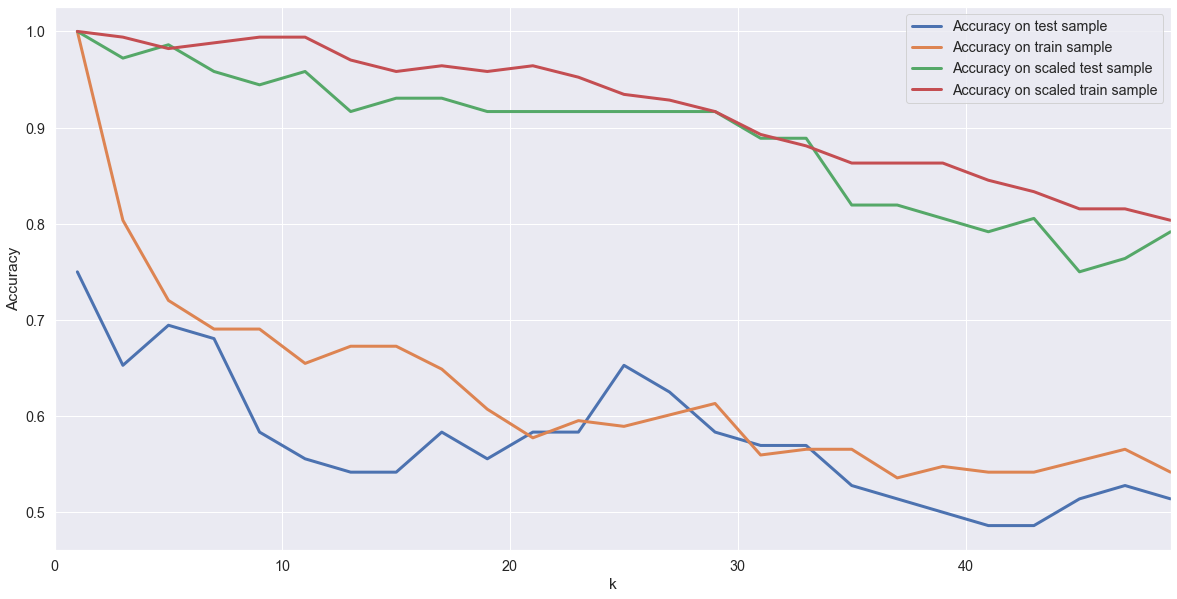

In [74]:
plt.figure(figsize=(20,10))
plt.plot(ks,scores_scaled,label="Accuracy on test sample",linewidth = 3)
plt.plot(ks,scores_scaled_train,label="Accuracy on train sample",linewidth = 3)
plt.plot(ks,scores,label="Accuracy on scaled test sample",linewidth = 3)
plt.plot(ks,scores_train,label="Accuracy on scaled train sample",linewidth = 3)
plt.xlim(0,49)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()


Сделайте выводы.

**Вывод**

#### **С увеличением числа соседей, начиная с некоторого значения, точность начинает падать, но при этом оптимальное значение k не находится на единице, т.к. на k=1 алгоритм не устойчив к шумовым выбросам. Предположу, что желательно k делать нечетным, чтобы одинаковое число соседей не принадлежало к разным классам. Следовательно, каждый раз нужно тщательно подбирать этот параметр.**

### Часть 2 

Теперь скачаем [датасет](https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate) о предсказании пульсаров.





Пульсары &mdash; это космические объекты, излучающие в различных диапазонах длины волны. Согласно современным астрофизическим теориям, пульсары представляют собой вращающиеся нейтронные звезды, обладающие магнитным полем, наклоненным относительно оси вращения.

Пульсары представляют значительный научный интерес. Поэтому есть потребность в автоматическом обнаружении интересных объектов для ускорения процесса изучения. На практике почти все обнаружения вызваны радиочастотными помехами и шумом, что затрудняет поиск достоверных сигналов. В последнее время для автоматического обнаружения пульсаров начали применять машинное обучение. Актуальная задача сегодня &mdash; бинарная классификация объектов-кандидатов на предмет того, являются ли они пульсарами.

В используемом датасете есть как примеры ложных обнаружений, так и примеры реальных пульсаров, подтвержденные учеными. Данные получены в результате [The High Time Resolution Universe Pulsar Survey I](https://arxiv.org/abs/1006.5744).

Мы будем работать только с файлом `pulsar_data_train.csv`.

In [36]:
data = pd.read_csv("pulsar_data_train.csv")

Сигнал от пульсаров представляет собой периодические импульсы.

Для описания объекта используется integrated profile (интегральный профиль) &mdash; агрегирование сигнала за разные периоды вращения (<a target="_blank" href="http://ipta.phys.wvu.edu/files/student-week-2017/IPTA2017_KuoLiu_pulsartiming.pdf">ссылка</a>, слайд 11). У всех пульсаров разные интегральные профили, и обычно эта характеристика мало меняется во времени.
В данном датасете интегральный профиль также усреднен по частоте.

Кроме того, импульс приходит в разное время на разных частотах. Задержка от частоты к частоте вызвана наличием ионизированной межзвездной среды и называется дисперсией. Не путать с дисперсией в теории вероятностей.

С дисперсией связана еще одна характеристика объекта &mdash; DM-SNR кривая. Подробнее об этой характеристике можно почитать <a target="_blank" href="https://arxiv.org/pdf/1005.5068.pdf#:~:text=period-DM%20diagram%3B%20good%20agreement,pulsars%20in%20their%20candidate%20plots.)">в специализированных материалах</a>.

Обе характеристики, integrated profile и DM-SNR кривая, представляют собой одномерные функции.
При создании датасета значения функций были посчитаны в конечном количестве $n$ точек.
Фактически, были получены реализации выборки двух случайных величин.

Пусть $P = (p_1, \ldots p_n)$ &mdash; массив значений integrated profile.
Для него можно посчитать следующие статистики:

1.   Выборочное среднее $\bar p = \frac{1}{n}\sum \limits_{i=1}^n p_i$;
2.   Выборочное стандартное отклонение $\sqrt{\frac{1}{n}\sum \limits_{i=1}^n (p_i - \bar p)^2}$;
3. Выборочный коэффициент асимметрии (skewness);
4. Выборочный коэффициент эксцесса (kurtosis).

Для $D = (d_1, \ldots d_n)$, массива значений DM-SNR, аналогично.

Именно эти значения по массивам $P$ и $D$ являются признаками в данном датасете.

Про коэффициенты эксцесса и асимметрии можно посмотреть <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0">здесь</a> и <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B0%D1%81%D0%B8%D0%BC%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%B8">здесь</a>, формулы для выборочных коэффициентов асимметрии и эксцесса можно найти в английской версии этих статей.

<a target="_blank" href="https://arxiv.org/pdf/1603.05166.pdf">Статья</a> с подробным описанием процесса генерации данных.










In [37]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


В этом датасете в некоторых столбцах есть пропуски в данных. Об этом говорит то, что значение Non-Null Count в таблице выше не равно количеству строк для некоторых столбцов. Чтобы не усложнять себе жизнь, пока просто не будем брать эти столбцы для анализа.

Столбец `target_class` отвечает за целевую переменную — индикатор того, является ли объект пульсаром.

In [39]:
needed_columns = [' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve']  # используем только эти столбцы

X = data[needed_columns]

In [40]:
y = data['target_class']

Разделите данные на train и test, установив `test_size=0.15`.

In [41]:
X_trainp, X_testp, y_trainp, y_testp = train_test_split(X,y, test_size=0.15)

Обучите стандартный классификатор kNN на тренировочных данные. Выведите значения метрик качества на тренировочной и тестовой выборках.

In [42]:
modelp= KNeighborsClassifier()
modelp.fit(X_trainp,y_trainp)
y_pred_train=modelp.predict(X_trainp)
y_pred=modelp.predict(X_testp)
y_trainp, y_testp = y_trainp.to_numpy(), y_testp.to_numpy()

Теперь посчитайте долю правильных ответов по каждому классу. Напишите вычисления этих долей самостоятельно. 

Сравните результаты. Одинаково ли хорошо предсказан каждый класс? Сделайте выводы.

In [43]:
def accuracy_score0(y_true, y_pred):
    acc=0
    sch=0
    for i in range(len(y_true)):
        if (y_true[i]) > (y_pred[i]):
            sch+=1
    acc=1-(sch/len(y_true))
    return(acc)
def accuracy_score1(y_true, y_pred):
    acc=0
    sch=0
    for i in range(len(y_true)):
        if y_true[i] < y_pred[i]:
            sch+=1
    acc=1-(sch/len(y_true))
    return(acc)
print('Right predicted "fakes" on the test sample ',round(accuracy_score0(y_testp,y_pred),4))
print('Right predicted pulsars on the test sample ',round(accuracy_score1(y_testp,y_pred),4))
print('Right predicted "fakes" on the train sample ',round(accuracy_score0(y_trainp,y_pred_train),4))
print('Right predicted pulsars on the train sample ',round(accuracy_score1(y_trainp,y_pred_train),4))

Right predicted "fakes" on the test sample  0.9713
Right predicted pulsars on the test sample  0.9947
Right predicted "fakes" on the train sample  0.9838
Right predicted pulsars on the train sample  0.996


#### **Выводы: Что в тренировочной, что в тестовой выборке настоящие пульсары предсказываются точнее, чем различные помехи, выдающие себя за них, но на незначительную величину ~2%.**

Подберите оптимальное число соседей с использованием метрики accuracy. Сделайте выводы.

In [46]:
ksp = np.arange(1, 50, 2)
modelsp = [KNeighborsClassifier(n_neighbors=k) for k in ksp]
for k in range(len(ksp)):
    modelsp[k].fit(X_trainp, y_trainp)
scores = [accuracy_score(y_testp,elem.predict(X_testp)) for elem in modelsp]
scores_train = [accuracy_score(y_trainp,elem.predict(X_trainp)) for elem in modelsp]

Text(0, 0.5, 'Accuracy')

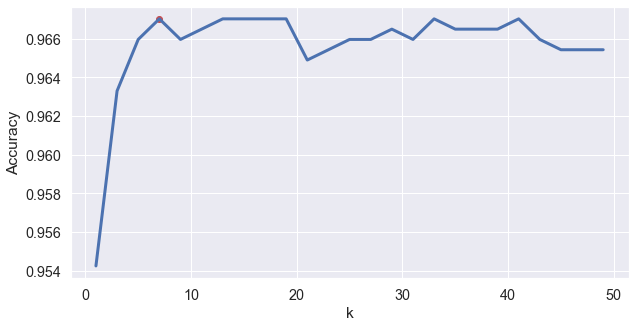

In [63]:

plt.figure(figsize=(10,5))
plt.plot(ksp,scores, label="Accuracy on test sample", linewidth = 3)
plt.scatter(ksp[3],scores[3],color='r')
plt.xlabel('k')
plt.ylabel('Accuracy')

#### **Наибольшая точность достигается при k=4 и от k=7 до k=10.**

Дополнительно можно почитать о классификации пульсаров, например, в <a target="_blank" href="https://medium.com/duke-ai-society-blog/classifying-pulsar-stars-using-ai-techniques-d2be70c0f691">этой статье</a>.